# Нейронные сети. Теория

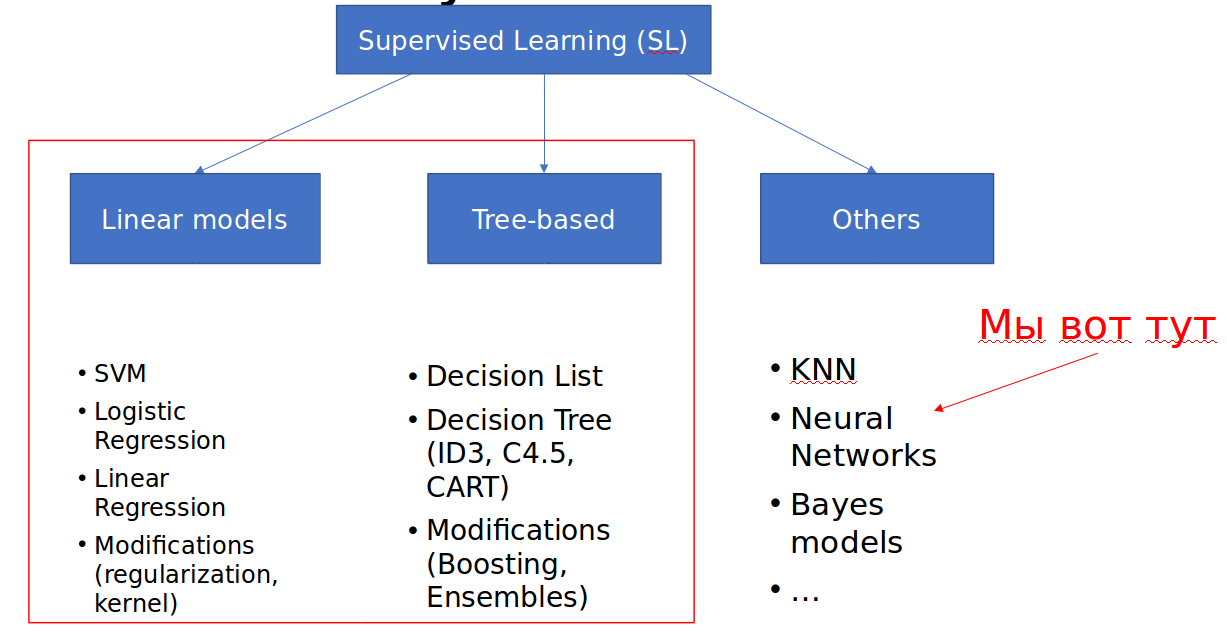

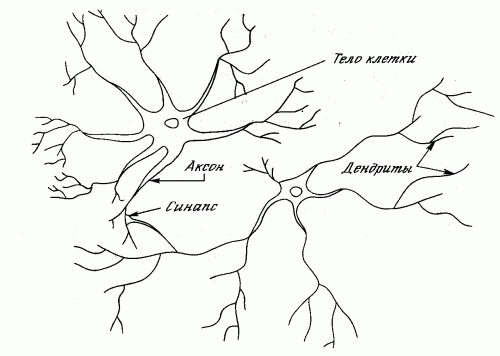

Можно ли математически воссоздать (смоделировать) этот процесс? 

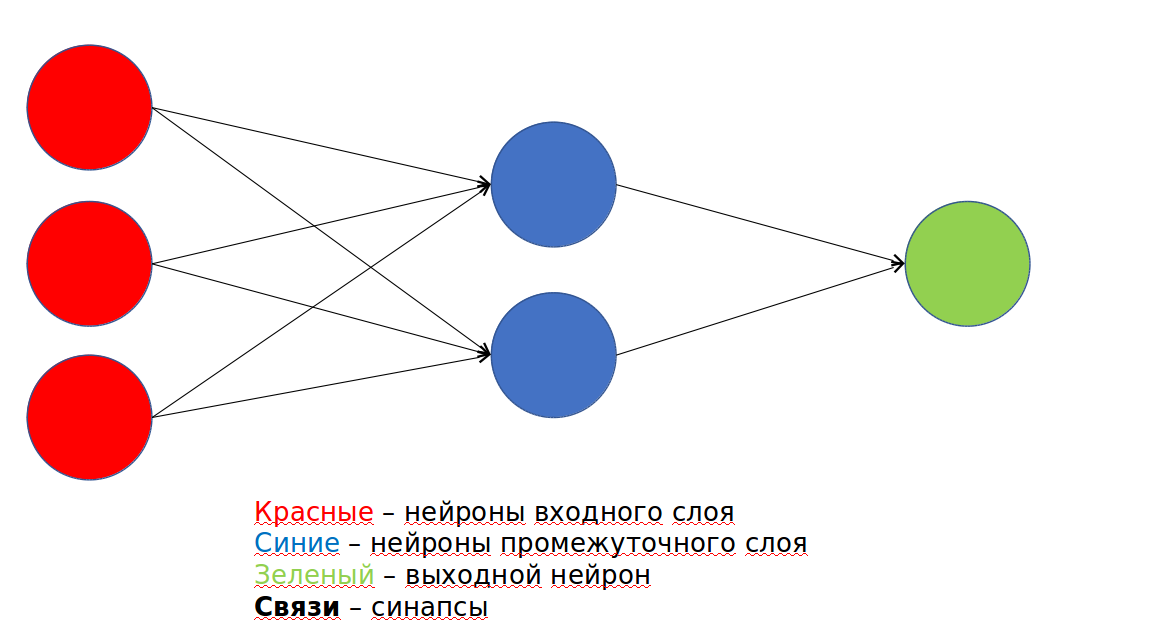

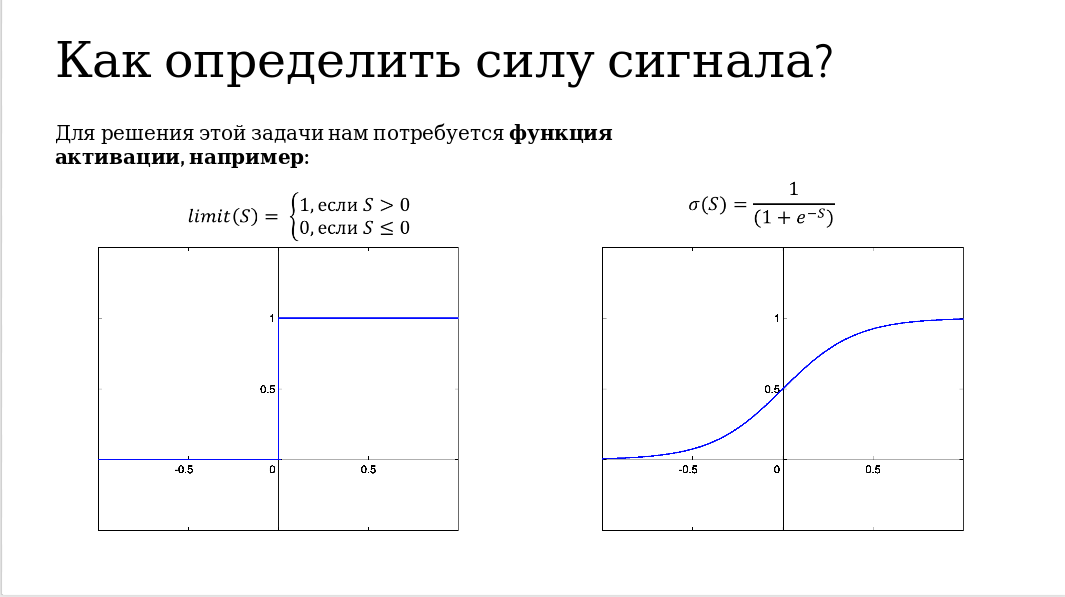

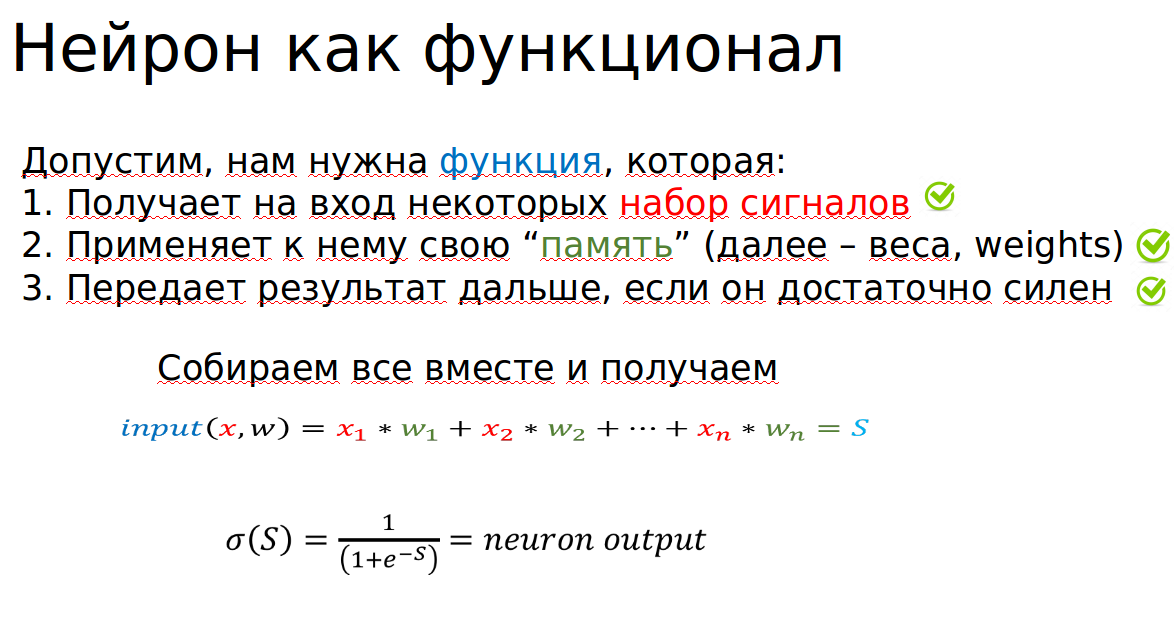

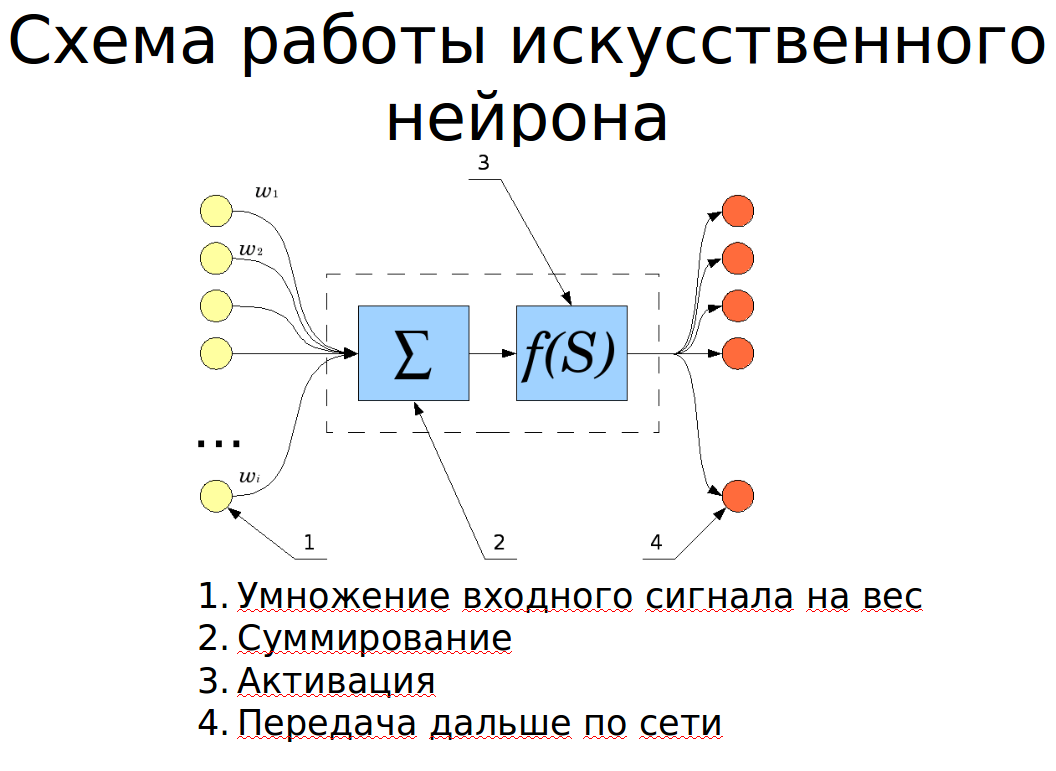

## Интерактивная визуализация
[Визуализация](https://playground.tensorflow.org)

# Нейронные сети. Практика

In [1]:
!pip install keras
!pip install theano

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os
os.environ['KERAS_BACKEND'] = 'theano' # подключение библиотеки theano в качестве "движка" для keras
from keras import backend as K # необходимо для некоторых операций

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b"In file included from /tmp/try_flags_jhli_xex.c:3:0:\n/usr/include/stdio.h:365:45: error: expected initializer before '__THROWNL'\n       const char *__restrict __format, ...) __THROWNL;\n                                             ^~~~~~~~~\n/usr/include/stdio.h:380:26: error: expected initializer before '__THROWNL'\n        _G_va_list __arg) __THROWNL;\n                          ^~~~~~~~~\n/usr/include/stdio.h:388:6: error: expected initializer before '__THROWNL'\n      __THROWNL __attribute__ ((__format__ (__printf__, 3, 4)));\n      ^~~~~~~~~\n/usr/include

In [3]:
from keras.models import Sequential # Увидите позже, зачем это надо
from keras.layers import Dense

import numpy
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

RND_SEED = 7
plt.style.use('ggplot')

numpy.random.seed(RND_SEED)

%matplotlib inline

# Классификация

## Загрузка данных

Для тренеровки мы будем использовать достаточно известный набор данных [Pima Indians](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).

Признаки такие: <br\>
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)


In [4]:
df = pd.read_csv('diabetes.csv', sep=',')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X, y = df.iloc[:, :8].values, df.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RND_SEED)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Составляем модель

Построим простую 2х (3х) слойную нейронную сеть. Делать это в keras одно удовольствие

In [15]:
model = Sequential() # Последовательная модель (самая простая нейросеть с одним входом и одним выходом)
model.add(Dense(12, input_dim=8, init='normal', activation='relu')) # входной слой
model.add(Dense(8, init='normal', activation='relu')) # скрытый слой
model.add(Dense(1, init='uniform', activation='sigmoid')) # выходной слой

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="normal")`
  
/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Теперь надо задать функцию [ошибки](https://keras.io/objectives/), способ [оптимизации](https://keras.io/optimizers/) и метрику измерения [качества](https://keras.io/metrics/):

In [16]:
from keras.optimizers import SGD

In [17]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='sgd', 
              metrics=['accuracy'])

## Обучаем

In [18]:
# Fit the model
model.fit(X_train, y_train, # обучение
          nb_epoch=500, 
          batch_size=50, 
          verbose=2)

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 0s - loss: 0.6919 - acc: 0.6221
Epoch 2/500
 - 0s - loss: 0.6887 - acc: 0.6564
Epoch 3/500
 - 0s - loss: 0.6860 - acc: 0.6564
Epoch 4/500
 - 0s - loss: 0.6834 - acc: 0.6564
Epoch 5/500
 - 0s - loss: 0.6809 - acc: 0.6564
Epoch 6/500
 - 0s - loss: 0.6786 - acc: 0.6564
Epoch 7/500
 - 0s - loss: 0.6764 - acc: 0.6564
Epoch 8/500
 - 0s - loss: 0.6744 - acc: 0.6564
Epoch 9/500
 - 0s - loss: 0.6724 - acc: 0.6564
Epoch 10/500
 - 0s - loss: 0.6706 - acc: 0.6564
Epoch 11/500
 - 0s - loss: 0.6688 - acc: 0.6564
Epoch 12/500
 - 0s - loss: 0.6673 - acc: 0.6564
Epoch 13/500
 - 0s - loss: 0.6659 - acc: 0.6564
Epoch 14/500
 - 0s - loss: 0.6646 - acc: 0.6564
Epoch 15/500
 - 0s - loss: 0.6634 - acc: 0.6564
Epoch 16/500
 - 0s - loss: 0.6620 - acc: 0.6564
Epoch 17/500
 - 0s - loss: 0.6608 - acc: 0.6564
Epoch 18/500
 - 0s - loss: 0.6598 - acc: 0.6564
Epoch 19/500
 - 0s - loss: 0.6587 - acc: 0.6564
Epoch 20/500
 - 0s - loss: 0.6578 - acc: 0.6564
Epoch 21/500
 - 0s - loss: 0.6571 - acc: 0.6564
E

Epoch 171/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 172/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 173/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 174/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 175/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 176/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 177/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 178/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 179/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 180/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 181/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 182/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 183/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 184/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 185/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 186/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 187/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 188/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 189/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 190/500
 - 0s - loss: 0.6432 - acc: 0.6564
Epoch 191/500
 - 0s 

 - 0s - loss: 0.6416 - acc: 0.6564
Epoch 339/500
 - 0s - loss: 0.6416 - acc: 0.6564
Epoch 340/500
 - 0s - loss: 0.6415 - acc: 0.6564
Epoch 341/500
 - 0s - loss: 0.6415 - acc: 0.6564
Epoch 342/500
 - 0s - loss: 0.6415 - acc: 0.6564
Epoch 343/500
 - 0s - loss: 0.6414 - acc: 0.6564
Epoch 344/500
 - 0s - loss: 0.6414 - acc: 0.6564
Epoch 345/500
 - 0s - loss: 0.6414 - acc: 0.6564
Epoch 346/500
 - 0s - loss: 0.6413 - acc: 0.6564
Epoch 347/500
 - 0s - loss: 0.6413 - acc: 0.6564
Epoch 348/500
 - 0s - loss: 0.6413 - acc: 0.6564
Epoch 349/500
 - 0s - loss: 0.6412 - acc: 0.6564
Epoch 350/500
 - 0s - loss: 0.6412 - acc: 0.6564
Epoch 351/500
 - 0s - loss: 0.6412 - acc: 0.6564
Epoch 352/500
 - 0s - loss: 0.6411 - acc: 0.6564
Epoch 353/500
 - 0s - loss: 0.6411 - acc: 0.6564
Epoch 354/500
 - 0s - loss: 0.6410 - acc: 0.6564
Epoch 355/500
 - 0s - loss: 0.6410 - acc: 0.6564
Epoch 356/500
 - 0s - loss: 0.6410 - acc: 0.6564
Epoch 357/500
 - 0s - loss: 0.6409 - acc: 0.6564
Epoch 358/500
 - 0s - loss: 0.6409

## Оценка качества

In [19]:
scores = model.evaluate(X_test, y_test) # усредненное качество по отложенной тестовой выборке
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

154/154 [==============================] - 0s 25us/step
acc: 72.08%


In [20]:
y_hat = model.predict(X_test).flatten()

In [21]:
y_hat[:10]

array([0.27393702, 0.56838065, 0.5213002 , 0.28475693, 0.3913657 ,
       0.3881046 , 0.27973065, 0.29804665, 0.6327508 , 0.2998851 ],
      dtype=float32)

In [99]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_hat, y_test)

Постройте ROC-кривые для обучающей и контрольной выборки. Есть ли переобучение?

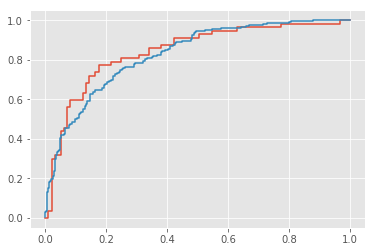

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_hat, )
plt.plot(fpr, tpr, label='test')

y_hat_train = model.predict(X_train).flatten()
fpr, tpr, _ = roc_curve(y_train, y_hat_train, )
plt.plot(fpr, tpr, label='train')

# Регрессия

Будем строить регрессию на данных [Boston Housing Data Set](https://archive.ics.uci.edu/ml/datasets/Housing)

Описание:<br\>
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 USD
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000's USD

Весь pipeline практически повторяется. Ну и повторим.

In [23]:
from sklearn import datasets

In [24]:
boston = datasets.load_boston()

In [25]:
y = boston.target

In [26]:
X = boston.data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RND_SEED)

In [28]:
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Составляем модель

Построим простую 2х (3х) слойную нейронную сеть. Делать это в keras одно удовольствие

In [29]:
model = Sequential()
model.add(Dense(12, input_dim=13, init='normal', activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='linear'))

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=13, activation="relu", kernel_initializer="normal")`
  
/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="normal")`
  after removing the cwd from sys.path.


Теперь надо задать функцию [ошибки](https://keras.io/objectives/), способ [оптимизации](https://keras.io/optimizers/) и метрику измерения [качества](https://keras.io/metrics/):

In [30]:
from keras.optimizers import SGD

In [31]:
# Compile model
model.compile(loss='mean_squared_error',
              optimizer='sgd', 
              metrics=['mean_squared_error'])

## Обучаем

In [32]:
# Fit the model
model.fit(X_train, y_train, 
          nb_epoch=500, 
          batch_size=50, 
          verbose=1)

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
404/404 [==============================] - 0s 25us/step - loss: 522.0162 - mean_squared_error: 522.0162
Epoch 2/500
404/404 [==============================] - 0s 23us/step - loss: 119.5049 - mean_squared_error: 119.5049
Epoch 3/500
404/404 [==============================] - 0s 22us/step - loss: 98.3739 - mean_squared_error: 98.3739
Epoch 4/500
404/404 [==============================] - 0s 21us/step - loss: 45.8149 - mean_squared_error: 45.8149
Epoch 5/500
404/404 [==============================] - 0s 25us/step - loss: 55.3430 - mean_squared_error: 55.3430
Epoch 6/500
404/404 [==============================] - 0s 27us/step - loss: 30.4008 - mean_squared_error: 30.4008
Epoch 7/500
404/404 [==============================] - 0s 23us/step - loss: 45.6802 - mean_squared_error: 45.6802
Epoch 8/500
404/404 [==============================] - 0s 29us/step - loss: 54.1414 - mean_squared_error: 54.1414
Epoch 9/500
404/404 [==============================] - 0s 23us/step - loss: 39.1800 

404/404 [==============================] - 0s 23us/step - loss: 21.3106 - mean_squared_error: 21.3106
Epoch 73/500
404/404 [==============================] - 0s 23us/step - loss: 12.7118 - mean_squared_error: 12.7118
Epoch 74/500
404/404 [==============================] - 0s 24us/step - loss: 10.7800 - mean_squared_error: 10.7800
Epoch 75/500
404/404 [==============================] - 0s 23us/step - loss: 11.0882 - mean_squared_error: 11.0882
Epoch 76/500
404/404 [==============================] - 0s 23us/step - loss: 9.6827 - mean_squared_error: 9.6827
Epoch 77/500
404/404 [==============================] - 0s 25us/step - loss: 8.2264 - mean_squared_error: 8.2264
Epoch 78/500
404/404 [==============================] - 0s 25us/step - loss: 8.8715 - mean_squared_error: 8.8715
Epoch 79/500
404/404 [==============================] - 0s 27us/step - loss: 13.8032 - mean_squared_error: 13.8032
Epoch 80/500
404/404 [==============================] - 0s 27us/step - loss: 41.1003 - mean_squared

404/404 [==============================] - 0s 23us/step - loss: 5.1627 - mean_squared_error: 5.1627
Epoch 144/500
404/404 [==============================] - 0s 28us/step - loss: 5.7216 - mean_squared_error: 5.7216
Epoch 145/500
404/404 [==============================] - 0s 24us/step - loss: 5.9561 - mean_squared_error: 5.9561
Epoch 146/500
404/404 [==============================] - 0s 23us/step - loss: 5.5503 - mean_squared_error: 5.5503
Epoch 147/500
404/404 [==============================] - 0s 35us/step - loss: 5.9578 - mean_squared_error: 5.9578
Epoch 148/500
404/404 [==============================] - 0s 23us/step - loss: 6.2704 - mean_squared_error: 6.2704
Epoch 149/500
404/404 [==============================] - 0s 23us/step - loss: 7.5531 - mean_squared_error: 7.5531
Epoch 150/500
404/404 [==============================] - 0s 27us/step - loss: 8.1931 - mean_squared_error: 8.1931
Epoch 151/500
404/404 [==============================] - 0s 24us/step - loss: 5.7480 - mean_squared_er

404/404 [==============================] - 0s 26us/step - loss: 7.6355 - mean_squared_error: 7.6355
Epoch 215/500
404/404 [==============================] - 0s 24us/step - loss: 9.1919 - mean_squared_error: 9.1919
Epoch 216/500
404/404 [==============================] - 0s 22us/step - loss: 11.9986 - mean_squared_error: 11.9986
Epoch 217/500
404/404 [==============================] - 0s 23us/step - loss: 7.6269 - mean_squared_error: 7.6269
Epoch 218/500
404/404 [==============================] - 0s 27us/step - loss: 7.6132 - mean_squared_error: 7.6132
Epoch 219/500
404/404 [==============================] - 0s 24us/step - loss: 7.5941 - mean_squared_error: 7.5941
Epoch 220/500
404/404 [==============================] - 0s 26us/step - loss: 7.9625 - mean_squared_error: 7.9625
Epoch 221/500
404/404 [==============================] - 0s 23us/step - loss: 14.8246 - mean_squared_error: 14.8246
Epoch 222/500
404/404 [==============================] - 0s 24us/step - loss: 12.9460 - mean_squar

404/404 [==============================] - 0s 25us/step - loss: 6.0810 - mean_squared_error: 6.0810
Epoch 286/500
404/404 [==============================] - 0s 25us/step - loss: 5.5446 - mean_squared_error: 5.5446
Epoch 287/500
404/404 [==============================] - 0s 25us/step - loss: 6.0273 - mean_squared_error: 6.0273
Epoch 288/500
404/404 [==============================] - 0s 23us/step - loss: 5.2977 - mean_squared_error: 5.2977
Epoch 289/500
404/404 [==============================] - 0s 26us/step - loss: 7.1120 - mean_squared_error: 7.1120
Epoch 290/500
404/404 [==============================] - 0s 23us/step - loss: 6.4770 - mean_squared_error: 6.4770
Epoch 291/500
404/404 [==============================] - 0s 26us/step - loss: 6.7738 - mean_squared_error: 6.7738
Epoch 292/500
404/404 [==============================] - 0s 23us/step - loss: 6.1325 - mean_squared_error: 6.1325
Epoch 293/500
404/404 [==============================] - 0s 22us/step - loss: 7.8000 - mean_squared_er

404/404 [==============================] - 0s 24us/step - loss: 5.9930 - mean_squared_error: 5.9930
Epoch 357/500
404/404 [==============================] - 0s 23us/step - loss: 4.7140 - mean_squared_error: 4.7140
Epoch 358/500
404/404 [==============================] - 0s 24us/step - loss: 5.9902 - mean_squared_error: 5.9902
Epoch 359/500
404/404 [==============================] - 0s 22us/step - loss: 7.5827 - mean_squared_error: 7.5827
Epoch 360/500
404/404 [==============================] - 0s 24us/step - loss: 5.3618 - mean_squared_error: 5.3618
Epoch 361/500
404/404 [==============================] - 0s 28us/step - loss: 4.3104 - mean_squared_error: 4.3104
Epoch 362/500
404/404 [==============================] - 0s 24us/step - loss: 3.9433 - mean_squared_error: 3.9433
Epoch 363/500
404/404 [==============================] - 0s 23us/step - loss: 4.7446 - mean_squared_error: 4.7446
Epoch 364/500
404/404 [==============================] - 0s 22us/step - loss: 5.7927 - mean_squared_er

Epoch 428/500
404/404 [==============================] - 0s 29us/step - loss: 4.3760 - mean_squared_error: 4.3760
Epoch 429/500
404/404 [==============================] - 0s 23us/step - loss: 3.4840 - mean_squared_error: 3.4840
Epoch 430/500
404/404 [==============================] - 0s 22us/step - loss: 3.6936 - mean_squared_error: 3.6936
Epoch 431/500
404/404 [==============================] - 0s 23us/step - loss: 6.6225 - mean_squared_error: 6.6225
Epoch 432/500
404/404 [==============================] - 0s 22us/step - loss: 3.7266 - mean_squared_error: 3.7266
Epoch 433/500
404/404 [==============================] - 0s 24us/step - loss: 4.1080 - mean_squared_error: 4.1080
Epoch 434/500
404/404 [==============================] - 0s 22us/step - loss: 3.8578 - mean_squared_error: 3.8578
Epoch 435/500
404/404 [==============================] - 0s 26us/step - loss: 5.0426 - mean_squared_error: 5.0426
Epoch 436/500
404/404 [==============================] - 0s 23us/step - loss: 4.2170 - m

404/404 [==============================] - 0s 23us/step - loss: 7.6012 - mean_squared_error: 7.6012
Epoch 500/500
404/404 [==============================] - 0s 23us/step - loss: 3.5506 - mean_squared_error: 3.5506


## Оценка качества

In [33]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f" % (model.metrics_names[1], scores[1]))

102/102 [==============================] - 0s 28us/step
mean_squared_error: 13.37


# Конволюционные нейронные сети

<img src='http://i.stack.imgur.com/oUwMk.png'>

In [34]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from keras.layers import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras import backend as K

In [35]:
from keras.optimizers import SGD

Загрузите архив [отсюда](https://github.com/lucastheis/deepbelief/blob/master/data/mnist.npz)

In [63]:
import numpy as np
mnist = np.load('mnist.npz')
X_train, y_train, X_test, y_test = mnist['train'].transpose(), mnist['train_labels'].transpose(), mnist['test'].transpose(), mnist['test_labels'].transpose()
n_train, n_test = X_train.shape[0], X_test.shape[0]
X_train, X_test = X_train.reshape(n_train, 28, 28), X_test.reshape(n_test, 28, 28) # преобразуем тензор картинок к виду [число объектов, ширина, высота]

n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, img_rows, img_cols

(60000, 10000, 28, 28)

Посмотрим на данные

## Готовим данные
Есть некоторые заморочки связанные с тем, в каком виде должны быть данные

In [65]:
X_train.shape

(60000, 28, 28)

In [66]:
img_rows, img_cols = 28, 28

if K.image_dim_ordering() != 'tf': # смотрим, в каком порядке идут размерности картинок в движке. В некоторых движках ширина и высота картинки идут последними двумя измерениями, в некоторых - первыми
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

In [67]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255 # преобразуем пиксели к масштабу [0,1]
X_test /= 255


# numbers 0-9, so ten classes
n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [68]:
X_train.shape

(60000, 28, 28, 1)

In [69]:
X_train[0].shape

(28, 28, 1)

(<matplotlib.image.AxesImage at 0x7fa9df01e828>,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

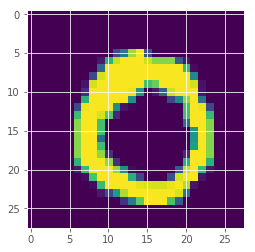

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[5][:, :, 0]), y_train[5]

## Составляем модель

In [74]:
# Количество конволюционных фильтров
n_filters = 32

# Размер фильра
n_conv = 3

# Размер пуллинга
n_pool = 2

# Размерность входной картинки
input_shape = (28, 28, 1)

model = Sequential()
model.add(Convolution2D( 
        n_filters, n_conv, n_conv,
        border_mode='valid',
        input_shape=input_shape,
        activation='relu'
))

# Конволюция
model.add(Convolution2D(n_filters, n_conv, n_conv, activation='relu'))

# Пуллинг
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))

# Выравниваем
model.add(Flatten())

# Делаем полносвязный слой
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Softmax в конце
model.add(Dense(n_classes, activation='softmax'))

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [75]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [76]:
model.fit(X_train,
          y_train,
          batch_size=32,
          nb_epoch=10,
          validation_data=(X_test, y_test),
          verbose=1)

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1990 - acc: 0.9389 - val_loss: 0.0520 - val_acc: 0.9821
Epoch 2/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0821 - acc: 0.9748 - val_loss: 0.0372 - val_acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0656 - acc: 0.9797 - val_loss: 0.0348 - val_acc: 0.9885
Epoch 4/10
12128/60000 [=====>........................] - ETA: 1:07 - loss: 0.0508 - acc: 0.9858

KeyboardInterrupt: 

## Внитри модели

In [77]:
for i, layer in enumerate(model.layers):
    print ("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t", layer.output_shape)

Layer 0 	 conv2d_3 		 (None, 28, 28, 1) 	 (None, 26, 26, 32)
Layer 1 	 conv2d_4 		 (None, 26, 26, 32) 	 (None, 24, 24, 32)
Layer 2 	 max_pooling2d_2 		 (None, 24, 24, 32) 	 (None, 12, 12, 32)
Layer 3 	 dropout_3 		 (None, 12, 12, 32) 	 (None, 12, 12, 32)
Layer 4 	 flatten_2 		 (None, 12, 12, 32) 	 (None, 4608)
Layer 5 	 dense_12 		 (None, 4608) 	 (None, 128)
Layer 6 	 dropout_4 		 (None, 128) 	 (None, 128)
Layer 7 	 dense_13 		 (None, 128) 	 (None, 10)


In [78]:
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
        W, b = layer.get_weights()
        print("Layer", i, "\t", layer.name, "\t\t", W.shape, "\t", b.shape)

Layer 0 	 conv2d_3 		 (3, 3, 1, 32) 	 (32,)
Layer 1 	 conv2d_4 		 (3, 3, 32, 32) 	 (32,)
Layer 5 	 dense_12 		 (4608, 128) 	 (128,)
Layer 7 	 dense_13 		 (128, 10) 	 (10,)


# Цветные картинки

In [79]:
from keras.datasets import cifar10
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

170500096/170498071 [==============================] - 24s 0us/step


## Аугментация

Сеть должна уметь выполнять классификацию не зависимо от того, повернут ли объект, уменьшен он или увеличен и тп.
То есть в обучающей выборке должны содержаться такие элементарные трансформации. Кроме того, это совершенно бесплатно вам позволяет очень сильно увеличить размер вашей обучающей выборки (и притом ещё и разнообразить её новыми примерами). В случае с картинками это особо важно, потому что каждая размеченная картинка, как правило, "на вес золота"

In [80]:
from keras.preprocessing.image import ImageDataGenerator

generated_images = ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

generated_images.fit(X_train)

Далее, продолжаем по https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

In [83]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

BATCH_SIZE = 400
NB_EPOCHES = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(generated_images.flow(X_train, Y_train,
                                 batch_size=BATCH_SIZE),
                    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(BATCH_SIZE))),
                    epochs=NB_EPOCHES,
                    validation_data=(X_test, Y_test),
                    workers=4, verbose=1)

Epoch 1/10
125/125 [==============================] - 175s 1s/step - loss: 2.0806 - acc: 0.2307 - val_loss: 2.1560 - val_acc: 0.1859
Epoch 2/10
 30/125 [======>.......................] - ETA: 2:04 - loss: 1.9516 - acc: 0.2839

KeyboardInterrupt: 

In [84]:
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 15s 2ms/step
Test loss: 2.1649517322540284
Test accuracy: 0.188


In [89]:
Y_test.shape

(10000, 10)